In [1]:
from ODSReader.ODSReader import ODSReader
from rc import extract_talk
import os
import subprocess
from scikits import audiolab
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
doc = ODSReader('rc2017.ods')
parameters = {x[0]: x[1] for x in doc.getSheet(u'parameters')}
panel_discussions = doc.getSheet(u'extract_qa')[1:]

In [3]:
panel_discussions[0]

[u'panel_20170712',
 u'hall_A/20170712/aand/video',
 u'hall_A/20170712/aand/video/handcam',
 None,
 u'15',
 u'63000',
 u'16',
 u'1932000',
 u'666',
 u'667']

In [11]:
subprocess.check_call([
    'ffmpeg',
    # global options:
    #'-safe', '0', # allow absolute paths
    '-y', # overwrite
    # input stream 0:
    '-i', 'hall_A/20170712/aand/video/MVI_0015.MP4',
    # output options:
    'one.wav'
])

0

In [12]:
subprocess.check_call([
    'ffmpeg',
    # global options:
    #'-safe', '0', # allow absolute paths
    '-y', # overwrite
    # input stream 0:
    '-i', 'hall_A/20170712/aand/video/handcam/MVI_0666.MP4',
    # output options:
    'two.wav'
])

0

OK, sample rates are the same.
OK, audio encodings are the same.


(98979840,)
(98771968,)
(480,)


<IPython.core.display.Javascript object>


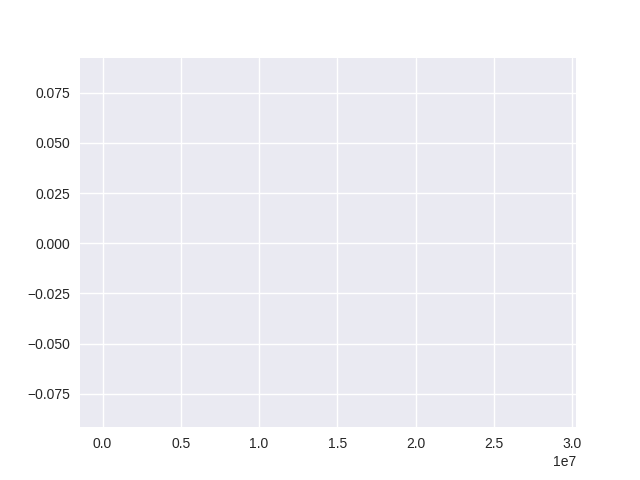

In [18]:
corr = np.correlate(longer[:int(10*60*fs1)], snippet, mode='valid')
plt.figure()
plt.plot(corr)
plt.show()

In [19]:
corr

array([  5.60602453e-03,   6.21685665e-03,   6.93276338e-03, ...,
         5.83920628e-05,  -1.91917643e-05,  -9.95947048e-05])